# Pneumonia Prediction Using Chest X-Ray Images
Pneumonia is a life-threatening infection affecting the lungs, and timely diagnosis is critical for successful treatment. Chest X-rays are a common diagnostic tool used by medical professionals to detect pneumonia. However, manual interpretation of these images can be subjective and prone to errors, especially in resource-limited settings. This project aims to develop an automated approach to predict pneumonia from chest X-ray images using a deep learning model.

The objective is to implement a Convolutional Neural Network (CNN) using transfer learning with a pre-trained ResNet-50 model to classify chest X-ray images as either "normal" or "pneumonia" positive. The model is trained and evaluated on a publicly available dataset from Kaggle, which consists of thousands of labeled chest X-ray images. By leveraging deep learning techniques, this project seeks to create an accurate diagnostic tool that could support radiologists in pneumonia detection, improving diagnostic accuracy and reducing manual workload.

**Dataset:** 

Chest X-Ray Images (Pneumonia)

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

## Data Preprocessing
The dataset consists of chest X-ray images categorized into two classes: "Normal" and "Pneumonia." The first step involves loading the images and organizing them for the model. Images are resized to a fixed shape (224x224) to fit the input requirement of the ResNet-50 model. The labels are encoded into binary values, with "0" for normal and "1" for pneumonia cases. The dataset was split into an 80:10:10 ratio for training, validation, and testing, respectively.

In [1]:
# Import the required libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define dataset paths
base_dir = 'chest_xray/'
normal_dir = os.path.join(base_dir, 'NORMAL')
pneumonia_dir = os.path.join(base_dir, 'PNEUMONIA')

In [3]:
# Check number of images in each folder
print(f'Normal images: {len(os.listdir(normal_dir))}')
print(f'Pneumonia images: {len(os.listdir(pneumonia_dir))}')

Normal images: 1341
Pneumonia images: 3875


In [4]:
# Create lists for images and labels
images = []
labels = []

In [5]:
# Load normal images
for img_name in os.listdir(normal_dir):
    img_path = os.path.join(normal_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    images.append(img)
    labels.append(0)  # Normal class

# Load pneumonia images
for img_name in os.listdir(pneumonia_dir):
    img_path = os.path.join(pneumonia_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(1)  # Pneumonia class

In [6]:
# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [7]:
print(images.shape)
print(labels.shape)

(5216, 224, 224, 3)
(5216,)


In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test

In [9]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4172, 224, 224, 3) (4172,)
(522, 224, 224, 3) (522,)
(522, 224, 224, 3) (522,)


## Transfer Learning using ResNet-50
Transfer learning is a powerful method for adapting pre-trained models to new tasks. In this project, a ResNet-50 model, originally trained on ImageNet, was used as a base model. By freezing the convolutional layers, the model's learned image features were preserved, accelerating training for pneumonia detection. 

In [10]:
# Load a pretrained ResNet model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [11]:
# Freeze the base model
base_model.trainable = False

In [12]:
# Create the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10


131/131 [==============================] - 155s 1s/step - loss: 0.5697 - accuracy: 0.9516 - val_loss: 0.3160 - val_accuracy: 0.9521
Epoch 2/10
131/131 [==============================] - 161s 1s/step - loss: 0.2292 - accuracy: 0.9736 - val_loss: 0.2926 - val_accuracy: 0.9770
Epoch 3/10
131/131 [==============================] - 161s 1s/step - loss: 0.0470 - accuracy: 0.9930 - val_loss: 0.2466 - val_accuracy: 0.9808
Epoch 4/10
131/131 [==============================] - 157s 1s/step - loss: 0.0331 - accuracy: 0.9945 - val_loss: 0.3261 - val_accuracy: 0.9751
Epoch 5/10
131/131 [==============================] - 159s 1s/step - loss: 0.0413 - accuracy: 0.9942 - val_loss: 0.2840 - val_accuracy: 0.9808
Epoch 6/10
131/131 [==============================] - 166s 1s/step - loss: 0.0396 - accuracy: 0.9952 - val_loss: 0.2003 - val_accuracy: 0.9751
Epoch 7/10
131/131 [==============================] - 156s 1s/step - loss: 0.0224 - accuracy: 0.9976 - val_loss: 0.2251 - val_accuracy: 0.97

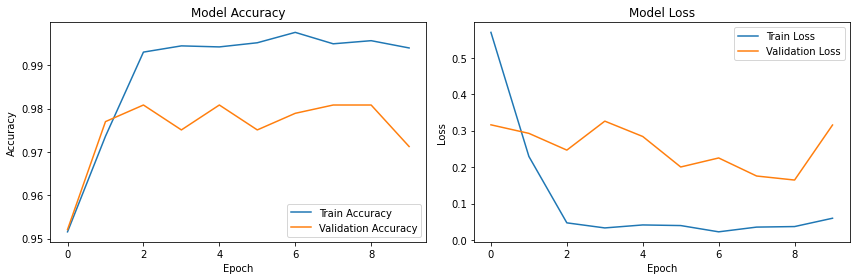

In [15]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Model Evaluation

In [16]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

17/17 [==============================] - 17s 1s/step - loss: 0.4120 - accuracy: 0.9770
Test Loss: 0.4120, Test Accuracy: 0.9770


In [17]:
# Predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

17/17 [==============================] - 18s 1s/step
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       133
           1       0.97      1.00      0.98       389

    accuracy                           0.98       522
   macro avg       0.98      0.96      0.97       522
weighted avg       0.98      0.98      0.98       522



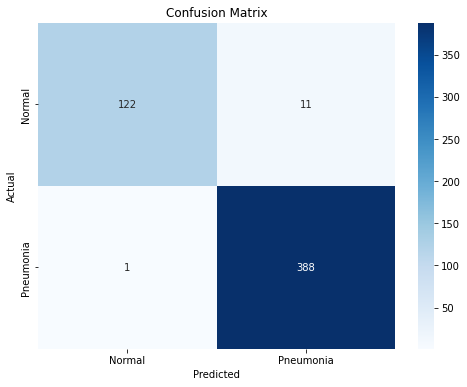

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Visualizing Images with Actual vs. Predicted Labels

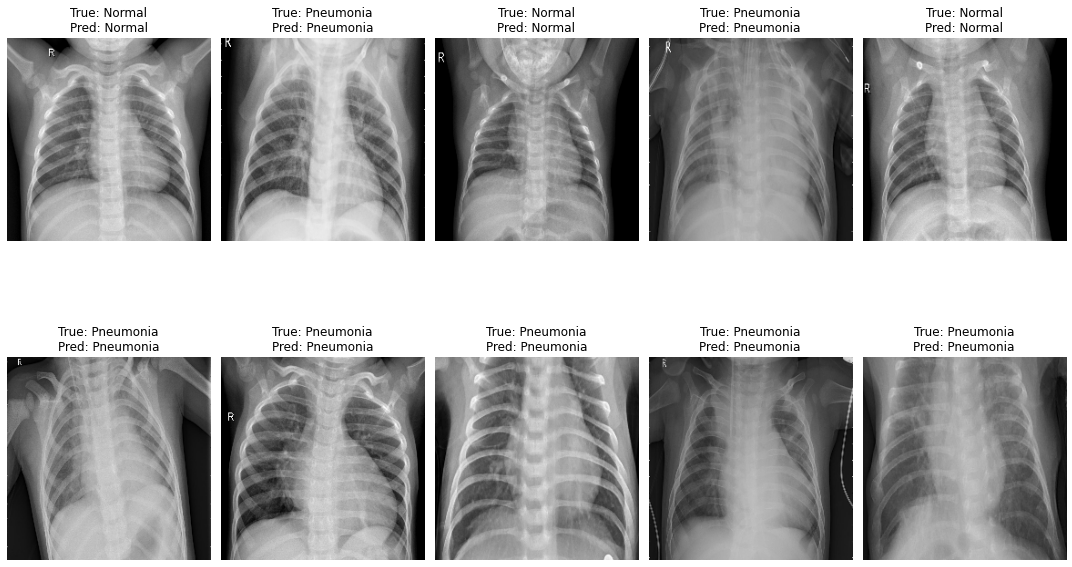

In [19]:
# Randomly select a few images from the test set
num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {'Normal' if y_test[idx] == 0 else 'Pneumonia'}\nPred: {'Normal' if y_pred[idx] == 0 else 'Pneumonia'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Conclusion
In this project, I successfully implemented a deep learning model using the ResNet-50 architecture to predict pneumonia from chest X-ray images. The model achieved high accuracy on both the validation and test sets, with a test accuracy of 97.7%. With a high recall for pneumonia, the model ensures that nearly all pneumonia cases are identified, which is essential for avoiding missed diagnoses. Moreover, the number of false positives is low, reducing the likelihood of unnecessary treatment for patients without pneumonia. The findings suggest that deep learning models can offer a reliable, accurate, and transparent solution to assist in the diagnosis of pneumonia.

The project can be extended by experimenting with more advanced architecture and exploring additional evaluation metrics. Furthermore, since pneumonia cases outnumber normal cases, strategies such as class weighting or oversampling of normal cases can be explored to mitigate any imbalance and ensure the model does not favor the dominant class. In addition, incorporating model explainability tools, such as Grad-CAM (Gradient-weighted Class Activation Mapping), can help visualize which parts of the X-ray the model focuses on when predicting pneumonia, which could help radiologists verify model predictions.